In [3]:
import sys, os
from pathlib import Path

SRC_PATH = Path.cwd().parent
sys.path.append(str(SRC_PATH))

import metrics as metrics
import preprocessing as pre
import timeline as timeline
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
from kloppy.domain import Time, Period, PositionType
from mplsoccer import Pitch, VerticalPitch
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
background_color = '#F5F5F5'
primary_text_color = '#000000'
secondary_text_color = '#757575'
primary_color = '#649CCB'
highlight_color = "#203490"


In [5]:
match_id = 1886347
df, metadata = pre.load_tracking_as_long_dataframe(match_id, True)
df = pre.add_match_time(df)


home, away = metadata.teams

team_id = home.team_id

df = pre.add_in_possession_column(df, team_id)

In [6]:
df_frame_metrics = timeline.compute_match_metrics_by_frame(df, team_id, False)

AttributeError: module 'timeline' has no attribute 'compute_match_metrics_by_frame'

In [ ]:
smoothed_timeline = timeline.build_timeline_smoothed(df_frame_metrics, window_seconds=5.0, smooth_window=9)


In [ ]:
def plot_timeline_by_metric_half(timeline_df, metric_col, title=None):
    df = timeline_df.copy().sort_values("time_bin")

    first_half  = df[df["period_id"] == 1].copy()
    second_half = df[df["period_id"] == 2].copy()
    
    first_half["t_min"]  = (first_half["time_bin"]  - first_half["time_bin"].min())  / 60
    second_half["t_min"] = (second_half["time_bin"] - second_half["time_bin"].min()) / 60
    # Primer tiempo en segundos:
    t1_start = first_half["time_bin"].min()
    t1_end   = first_half["time_bin"].max()

    # Segundo tiempo en segundos:
    t2_start = second_half["time_bin"].min()
    t2_end   = second_half["time_bin"].max()

    # Conversion a minutos relativos
    t1_end_min = (t1_end - t1_start) / 60
    t2_end_min = (t2_end - t2_start) / 60

    fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharey=True)

    axes[0].plot(first_half["t_min"], first_half[metric_col], linewidth=2)
    axes[0].set_title(f"{metric_col} - First Half", pad=20)
    axes[0].set_xlabel("Minutes")
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xticks([0, 15, 30, t1_end_min])     # primer tiempo
    axes[0].set_xticklabels(["0", "15", "30", f"{t1_end_min:.1f}"])

    axes[1].plot(second_half["t_min"], second_half[metric_col])
    axes[1].set_title(f"{metric_col} - Second Half", pad=20)
    axes[1].set_xlabel("Minutes")
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xticks([0, 15, 30, t2_end_min])
    axes[1].set_xticklabels(["0", "15", "30", f"{t2_end_min:.1f}"])

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_timeline_by_metric_full_match(timeline_df, metric_col, title=None):
    df = timeline_df.copy().sort_values("time_bin")

    fig, ax = plt.subplots(figsize=(14,4))
    ax.plot(df["time_bin"], df[metric_col], linewidth=2)

    # Ticks estándar cada 15 min
    ticks = [0, 15*60, 30*60, 45*60, 60*60, 75*60, 90*60]
    labels = ["0", "15", "30", "45", "60", "75", "90"]
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)

    # Líneas especiales del partido real
    t_start = df["time_bin"].min()
    t_end   = df["time_bin"].max()
    ht_end  = df[df["period_id"]==1]["time_bin"].max()
    
    ax.axvline(ht_end, color="red", linestyle="--", alpha=0.8)
    ax.text(ht_end, ax.get_ylim()[1], "HT", ha="center", va="bottom", color="red")
    

    ax.set_xlabel("Minutes")
    ax.grid(True, axis="x", alpha=0.25)
    ax.set_title(f"{metric_col} - Match Overview", pad=20)
    ax.legend()
    plt.tight_layout()
    plt.show()

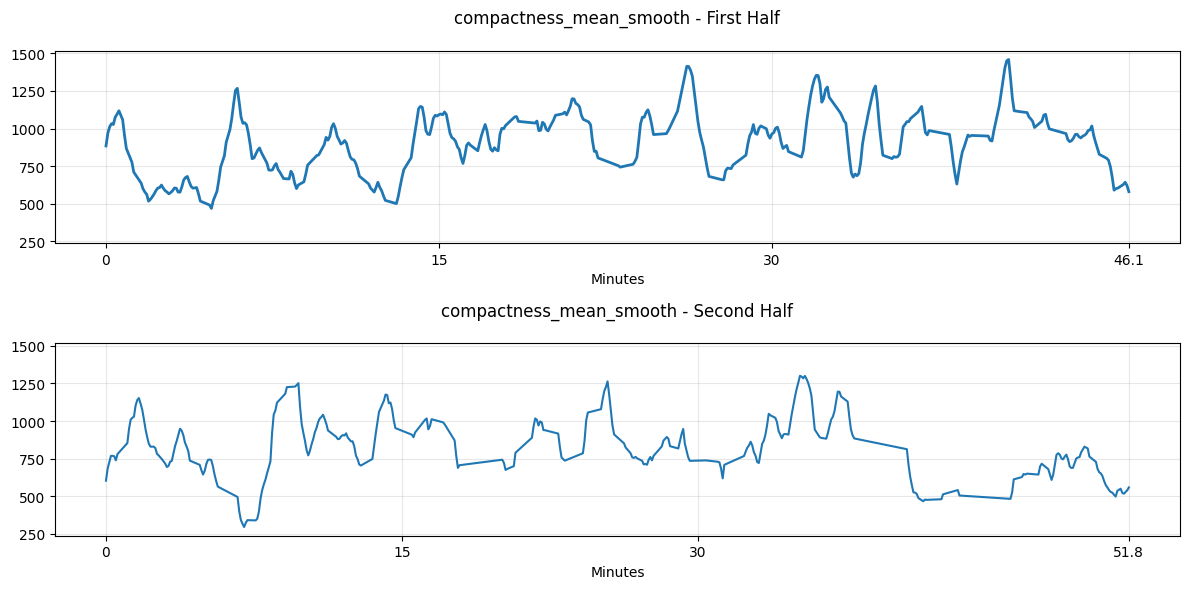

In [ ]:
plot_timeline_by_metric_half(smoothed_timeline, "compactness_mean_smooth")

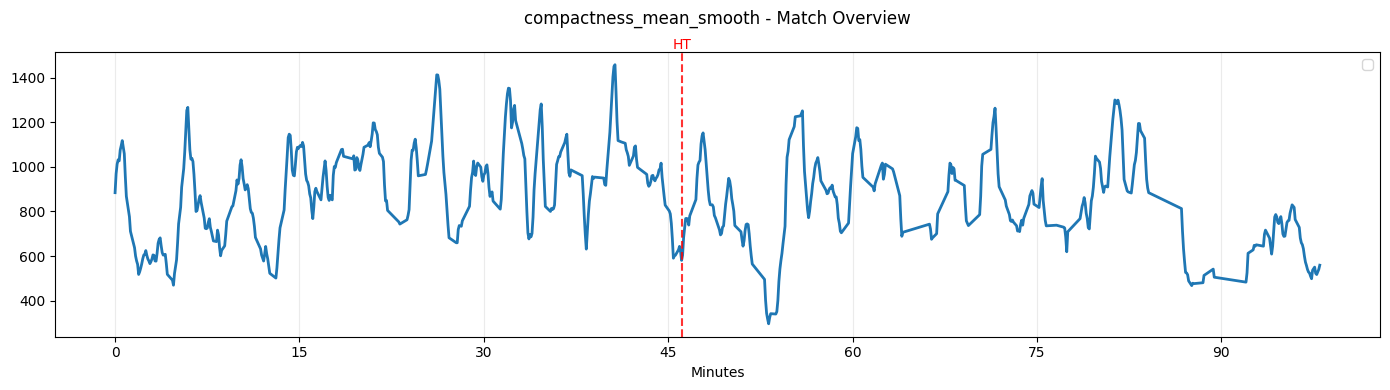

In [ ]:
plot_timeline_by_metric_full_match(smoothed_timeline, "compactness_mean_smooth")